In [1]:
%matplotlib widget
from main import *
import sympy as sp
import matplotlib.pyplot as plt
from sympy import Heaviside, sin, cos
sp.init_printing()

In [2]:
Vcc = 5

Vin = 10 + 6 * sin(t)

In [3]:
stabilisator = Solver.Circuit("stabilisator")
stabilisator.element(
                    VoltageSource("Vg", {"V+" : "Vg", "V-" : Gnd}, V_t = 10),
                    
                    Resistor("Rz", {"V1" : "Vg", "V2" : "Vz"}, R = 10e3),
                    Diode("Dz", {"Vp" : "Vz", "Vn" : Gnd}, Vd = 5),
                    
                    NPN("Q1", {"Vc" : "Vg", "Vb" : "Vz", "Ve" : "Vout"}),
                    
                    #Resistor("Rl", {"V1" : "Vout", "V2" : Gnd}, R = 4.4e3),
                    CurrentSource("Iout", {"V+" : "Vout", "V-" : Gnd}, I_t = -1e-2*t),
                    
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 10}},
 'Rz': {'name': 'Rz', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vz'}, 'values': {'R': 10000.0}},
 'Dz': {'name': 'Dz', 'type': 'Diode', 'nodes': {'Vp': 'Vz', 'Vn': 0}, 'values': {'Vd': 5, 'T': 300}},
 'Q1': {'name': 'Q1', 'type': 'NPN', 'nodes': {'Vc': 'Vg', 'Vb': 'Vz', 'Ve': 'Vout'}, 'values': {'Vdf': 0.6, 'Vdr': 0.4, 'Bf': 100, 'Br': 0.1}},
 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vout', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.01*t}}}

In [4]:
Solver.setMain("stabilisator")
compiled = Solver.compile()

In [5]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Vg"]["V+"]
Iin = compiled["currents"]["Vg"]["V-"]
Vout = compiled["nodes"]["Vout"]
#Iout = compiled["currents"]["Rl"]["V1"]
Iout = compiled["currents"]["Iout"]["V+"]

print(Vin)
print(Iin)
print(Vout)
print(Iout)

{'Vout': V0, 'Vz': V1, 'Vg': V2}
V2
I0_1
V0
I4_0


In [6]:
model = solveLaplace(compiled, 10, tstep = 0.1, measurments = {Vin, Iin, Vout, Iout}, debugLog = 1)

{I3_1, I3_2, I0_0, I3_0, I1_1, I2_0, V0, I2_1, I0_1, I4_1, I1_0, V2, I4_0, V1}
{V2, I4_0, I0_1, V0}
[Eq(I3_2 + I4_0, 0), Eq(I1_1 + I2_0 + I3_1, 0), Eq(I0_0 + I1_0 + I3_0, 0)]
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 10}}, 'Rz': {'name': 'Rz', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vz'}, 'values': {'R': 10000.0}}, 'Dz': {'name': 'Dz', 'type': 'Diode', 'nodes': {'Vp': 'Vz', 'Vn': 0}, 'values': {'Vd': 5, 'T': 300}}, 'Q1': {'name': 'Q1', 'type': 'NPN', 'nodes': {'Vc': 'Vg', 'Vb': 'Vz', 'Ve': 'Vout'}, 'values': {'Vdf': 0.6, 'Vdr': 0.4, 'Bf': 100, 'Br': 0.1}}, 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vout', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.01*t}}}
{'Vg': {'V+': V2, 'V-': 0}, 'Rz': {'V1': V2, 'V2': V1}, 'Dz': {'Vp': V1, 'Vn': 0}, 'Q1': {'Vc': V2, 'Vb': V1, 'Ve': V0}, 'Iout': {'V+': V0, 'V-': 0}}
{'Vg': {'V+': I0_0, 'V-': I0_1}, 'Rz': {'V1': I1_0, 'V2': I1_1}, 'Dz':

10it [00:02,  3.79it/s]                      


{('Dz', 'Cut'): [V1 <= 5], ('Q1', 'Fwd'): [I3_1 > 0, V1 - V2 <= 0.4]}
{('Dz', 'Cut'): [False], ('Q1', 'Fwd'): [True, True]}
*****************************************
{('Iout', ''), ('Rz', ''), ('Q1', 'Inv'), ('Dz', 'Cut'), ('Vg', '')}
[Eq(V2, 10/s), Eq(I0_0 + I0_1, 0), Eq(I1_0, -0.0001*V1 + 0.0001*V2), Eq(I1_0 + I1_1, 0), Eq(I2_0, 0), Eq(I2_1, 0), Eq(I3_2, 0.1*I3_1), Eq(I3_0, -1.1*I3_1), Eq(V1 - V2, 0.4/s), Eq(I4_1, -0.01/s**2), Eq(I4_0 + I4_1, 0), Eq(I3_2 + I4_0, 0), Eq(I1_1 + I2_0 + I3_1, 0), Eq(I0_0 + I1_0 + I3_0, 0)]
{('Dz', 'Cut'): [V1 <= 5], ('Q1', 'Inv'): [I3_1 > 0, -V0 + V1 <= 0.6]}
{V1, I3_1, I0_1, V2, I4_0, V0}
-------------------------------------------------
{('Q1', 'Sat'), ('Iout', ''), ('Rz', ''), ('Dz', 'Cut'), ('Vg', '')}
[Eq(V2, 10/s), Eq(I0_0 + I0_1, 0), Eq(I1_0, -0.0001*V1 + 0.0001*V2), Eq(I1_0 + I1_1, 0), Eq(I2_0, 0), Eq(I2_1, 0), Eq(I3_0 + I3_1 + I3_2, 0), Eq(-V0 + V1, 0.6/s), Eq(V1 - V2, 0.4/s), Eq(I4_1, -0.01/s**2), Eq(I4_0 + I4_1, 0), Eq(I3_2 + I4_0, 0), Eq(I1_1

20it [00:02,  8.50it/s]                      


{('Dz', 'Cut'): [V1 <= 5], ('Q1', 'Sat'): [I3_1 > 0, I3_0 < 100*I3_1, I3_2 < 0.1*I3_1]}
{('Dz', 'Cut'): [False], ('Q1', 'Sat'): [False, False, False]}
*****************************************
{('Iout', ''), ('Rz', ''), ('Q1', 'Cut'), ('Dz', 'Fwd'), ('Vg', '')}
[Eq(V2, 10/s), Eq(I0_0 + I0_1, 0), Eq(I1_0, -0.0001*V1 + 0.0001*V2), Eq(I1_0 + I1_1, 0), Eq(V1, 5/s), Eq(I2_0 + I2_1, 0), Eq(I3_0, 0), Eq(I3_1, 0), Eq(I3_2, 0), Eq(I4_1, -0.01/s**2), Eq(I4_0 + I4_1, 0), Eq(I3_2 + I4_0, 0), Eq(I1_1 + I2_0 + I3_1, 0), Eq(I0_0 + I1_0 + I3_0, 0)]
{('Dz', 'Fwd'): [I2_0 > 0], ('Q1', 'Cut'): [-V0 + V1 <= 0.6, V1 - V2 <= 0.4]}
{V1, I0_1, V2, I2_0, I4_0, V0}
-------------------------------------------------
{('Iout', ''), ('Rz', ''), ('Q1', 'Fwd'), ('Dz', 'Fwd'), ('Vg', '')}
[Eq(V2, 10/s), Eq(I0_0 + I0_1, 0), Eq(I1_0, -0.0001*V1 + 0.0001*V2), Eq(I1_0 + I1_1, 0), Eq(V1, 5/s), Eq(I2_0 + I2_1, 0), Eq(I3_0, 100*I3_1), Eq(I3_2, -101*I3_1), Eq(-V0 + V1, 0.6/s), Eq(I4_1, -0.01/s**2), Eq(I4_0 + I4_1, 0), Eq(I3_2

17it [00:02,  8.31it/s]                      


{('Dz', 'Fwd'): [I2_0 > 0], ('Q1', 'Fwd'): [I3_1 > 0, V1 - V2 <= 0.4]}
{('Dz', 'Fwd'): [True], ('Q1', 'Fwd'): [True, True]}
*****************************************
5.099999999999998 								
Changed state:  {('Dz', 'Fwd')}
5.050024414062498 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{('Iout', ''), ('Rz', ''), ('Q1', 'Cut'), ('Dz', 'Cut'), ('Vg', '')}
[Eq(V2, 10/s), Eq(I0_0 + I0_1, 0), Eq(I1_0, -0.0001*V1 + 0.0001*V2), Eq(I1_0 + I1_1, 0), Eq(I2_0, 0), Eq(I2_1, 0), Eq(I3_0, 0), Eq(I3_1, 0), Eq(I3_2, 0), Eq(I4_1, (-0.050500244140625*s - 0.01)/s**2), Eq(I4_0 + I4_1, 0), Eq(I3_2 + I4_0, 0), Eq(I1_1 + I2_0 + I3_1, 0), Eq(I0_0 + I1_0 + I3_0, 0)]
{('Dz', 'Cut'): [V1 <= 5], ('Q1', 'Cut'): [-V0 + V1 <= 0.6, V1 - V2 <= 0.4]}
{V1, I0_1, V2, I4_0, V0}
-------------------------------------------------
{('Iout', ''), ('Rz', ''), ('Q1', 'Fwd'), ('Dz', 'Cut'), ('Vg', '')}
[Eq(V2, 10/s), Eq(I0_0 + I0_1, 0), Eq(I1_0, -0.0001*V1 + 0.0001*V2), Eq(I1_0 + I1_1, 0), Eq(I2_0, 0), Eq(I2_1, 0), Eq(

8it [00:02,  3.61it/s]                       

{('Dz', 'Cut'): [V1 <= 5], ('Q1', 'Fwd'): [I3_1 > 0, V1 - V2 <= 0.4]}
{('Dz', 'Cut'): [True], ('Q1', 'Fwd'): [True, True]}
*****************************************
10.05002441406248 							
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [7]:
Pd = (Vin - Vout) * Iout + Vin * (Iin - Iout)

In [8]:
printModel(model, var=t, measurments=[Pd])

{('Iout', ''), ('Rz', ''), ('Q1', 'Fwd'), ('Dz', 'Fwd'), ('Vg', '')}
t ∈ Interval.Ropen(0, 5.05002441406250)
I4_0*(-V0 + V2) + V2*(I0_1 - I4_0)  : 
0.055009900990099⋅t + 0.005
-------------------------------------
{('Iout', ''), ('Rz', ''), ('Q1', 'Fwd'), ('Dz', 'Cut'), ('Vg', '')}
t ∈ Interval(5.05002441406250, 10.0500244140625)
I4_0*(-V0 + V2) + V2*(I0_1 - I4_0)  : 
(0.01⋅t + 0.050500244140625)⋅(0.99009900990099⋅t + 5.60002417233911)
-------------------------------------


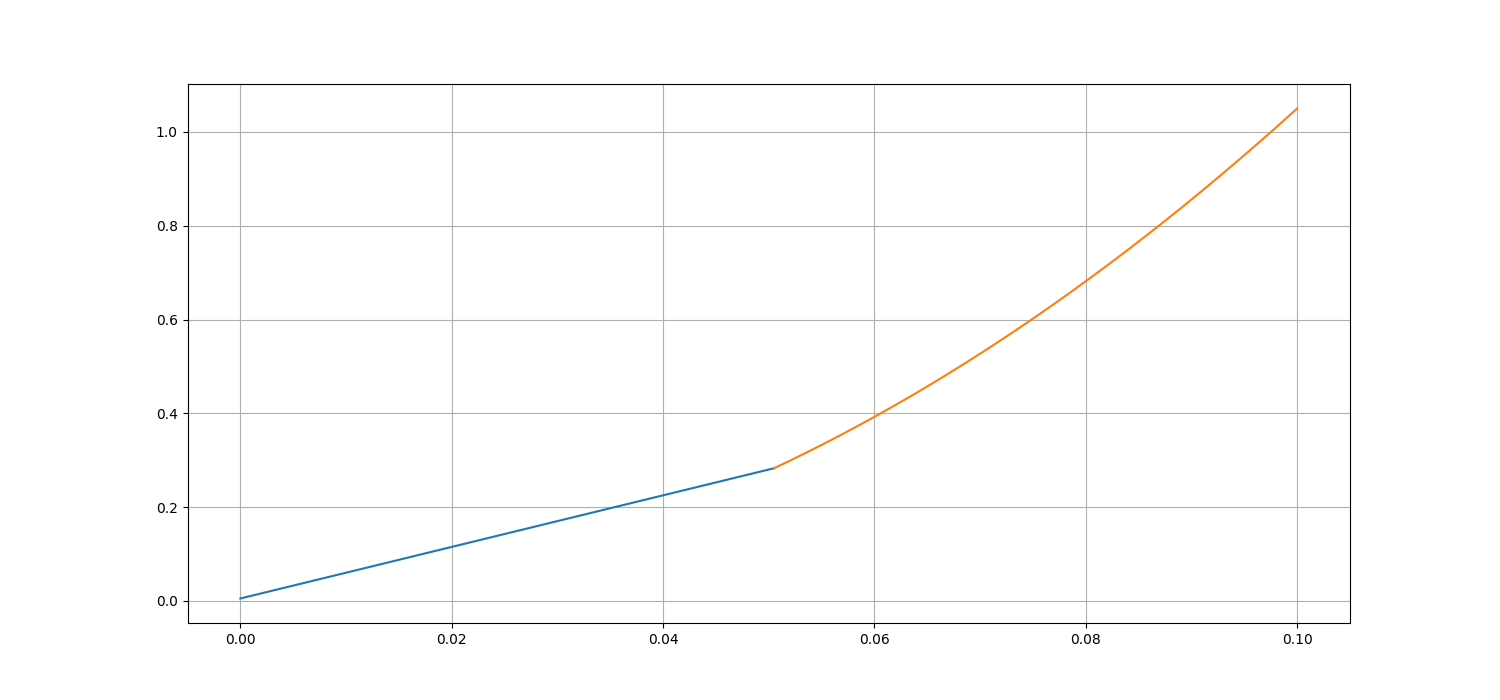

In [9]:
measurments =   [   
                    (Iout, Pd, "Vout(Iout)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

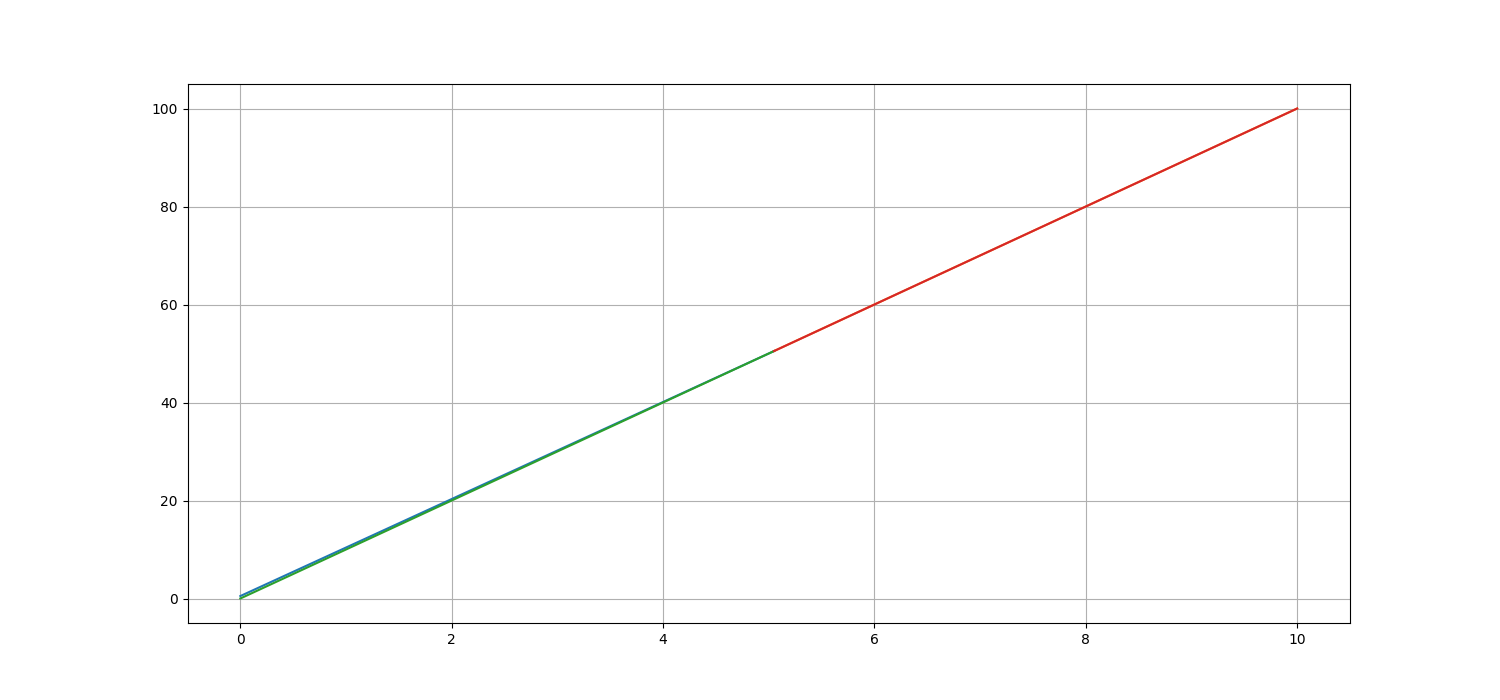

In [10]:
measurments =   [   
                    (t0, 1e3 * Iin, "Iin(t)"),
                    (t0, 1e3 * Iout, "Iout(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

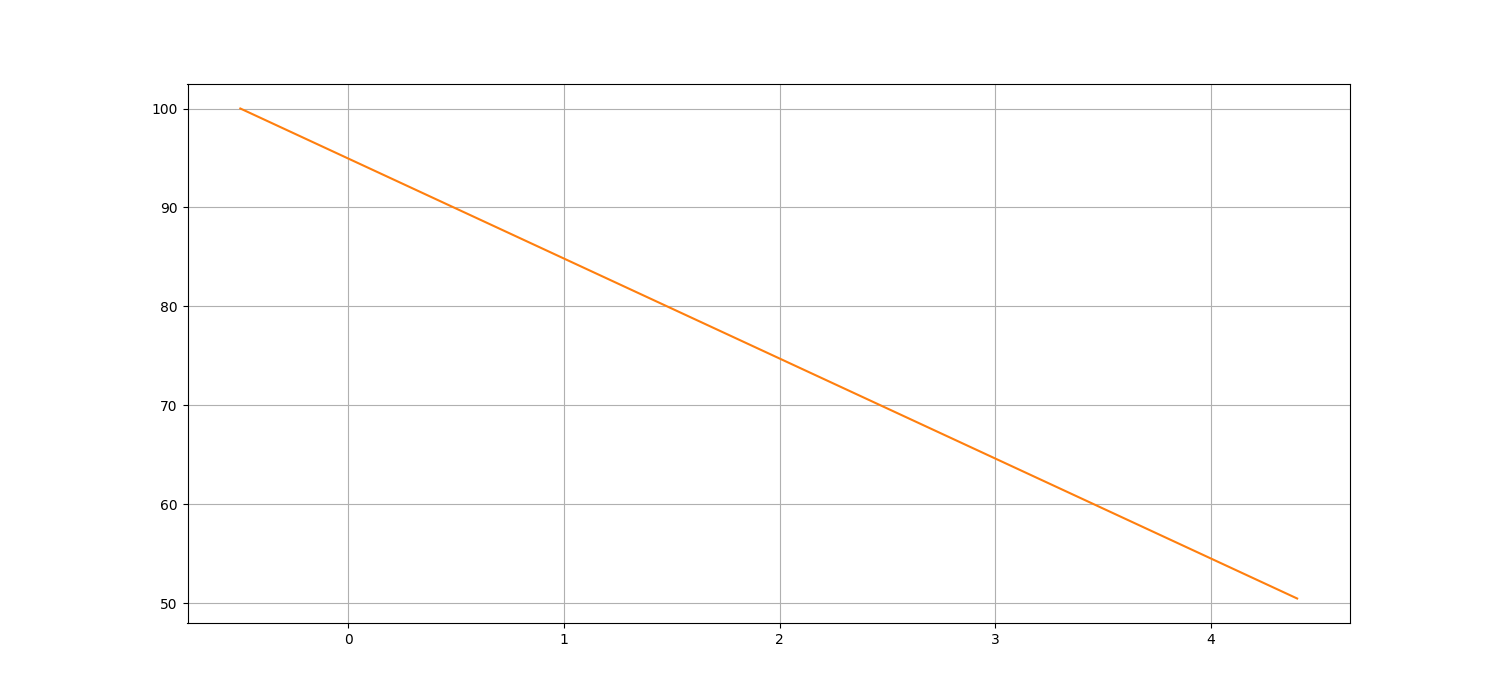

In [11]:
measurments =   [   
                    (Vout, 1e3 * Iout, "Iin(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()